In [3]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (roc_curve, auc, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report)

In [22]:
#LOAD DATA

df=pd.read_csv("D:/crop data2.csv")

In [23]:
df

,STATE,SOIL_TYPE,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE,CROP
0,Andaman and Nicobar,Sandy soil,90,42,43,20.879744,82.002744,6.502985,202.935536,7000,Amaranthus
1,Andaman and Nicobar,Sandy soil,85,58,41,21.770462,80.319644,7.038096,226.655537,5000,Green Banana
2,Andaman and Nicobar,Sandy soil,60,55,44,23.004459,82.320763,7.840207,263.964248,7000,Ladies Finger
3,Andaman and Nicobar,Sandy soil,74,35,40,26.491096,80.158363,6.980401,242.864034,7000,Bitter Gourd
4,Andaman and Nicobar,Sandy soil,78,42,42,20.130175,81.604873,7.628473,262.717340,120000,Black pepper
...,...,...,...,...,...,...,...,...,...,...,...
2195,West Bengal,Alluvial soil,107,34,32,26.774637,66.413269,6.780064,177.774507,1000,Onion
2196,West Bengal,Alluvial soil,99,15,27,27.417112,56.636362,6.086922,127.924610,800,Papaya
2197,West Bengal,Alluvial soil,118,33,30,24.131797,67.225123,6.362608,173.322839,560,Potato
2198,West Bengal,Alluvial soil,117,32,34,26.272418,52.127394,6.758793,127.175293,1500,Pumpkin


In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("D:/crop data2.csv")

# Target column
target_column = "STATE"

# Split into features (X) and target (y)
X = df.drop(columns=[target_column])
y = df[target_column]

print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)


Features (X) shape: (2200, 10)
Target (y) shape: (2200,)


In [2]:
print(X)

          SOIL_TYPE  N_SOIL  P_SOIL  K_SOIL  TEMPERATURE   HUMIDITY        ph  \
0        Sandy soil      90      42      43    20.879744  82.002744  6.502985   
1        Sandy soil      85      58      41    21.770462  80.319644  7.038096   
2        Sandy soil      60      55      44    23.004459  82.320763  7.840207   
3        Sandy soil      74      35      40    26.491096  80.158363  6.980401   
4        Sandy soil      78      42      42    20.130175  81.604873  7.628473   
...             ...     ...     ...     ...          ...        ...       ...   
2195  Alluvial soil     107      34      32    26.774637  66.413269  6.780064   
2196  Alluvial soil      99      15      27    27.417112  56.636362  6.086922   
2197  Alluvial soil     118      33      30    24.131797  67.225123  6.362608   
2198  Alluvial soil     117      32      34    26.272418  52.127394  6.758793   
2199  Alluvial soil     104      18      30    23.603016  60.396475  6.779833   

        RAINFALL  CROP_PRIC

In [3]:
print(y)

0       Andaman and Nicobar
1       Andaman and Nicobar
2       Andaman and Nicobar
3       Andaman and Nicobar
4       Andaman and Nicobar
               ...         
2195            West Bengal
2196            West Bengal
2197            West Bengal
2198            West Bengal
2199            West Bengal
Name: STATE, Length: 2200, dtype: object


In [5]:
# Import the train_test_split function from scikit-learn
from sklearn.model_selection import train_test_split

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Identify column types
numeric_cols = X.select_dtypes(include=['int64','float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols),
        ("cat", OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ]
)

# Fit + transform train set
X_train = preprocessor.fit_transform(X_train)

# Transform test set
X_test = preprocessor.transform(X_test)

In [9]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1760, 10)
X_test shape: (440, 10)
y_train shape: (1760,)
y_test shape: (440,)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Classification models
models = {
    "Logistic Regression": LogisticRegression(
        solver='liblinear', C=1.0, penalty='l2', random_state=42),

    "Decision Tree": DecisionTreeClassifier(
        criterion='gini', max_depth=5, min_samples_split=4, random_state=42),

    "Random Forest": RandomForestClassifier(
        n_estimators=200, max_depth=7, min_samples_split=3,
        min_samples_leaf=2, random_state=42),

    "SVM": SVC(
        kernel='rbf', C=1.5, gamma='scale', probability=True, random_state=42),

    "KNN": KNeighborsClassifier(
        n_neighbors=7, weights='distance', metric='minkowski', p=2)
}


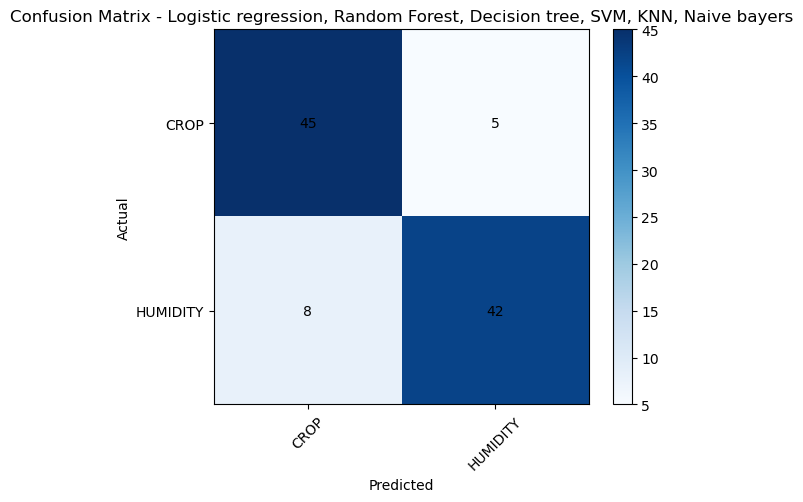

In [41]:
# Import matplotlib.pyplot first
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Define the missing variables
# Example confusion matrix (replace with your actual confusion matrix)
cm = np.array([[45, 5], [8, 42]])  # Example 2x2 confusion matrix

# Example name for the title
name = "Logistic regression, Random Forest, Decision tree, SVM, KNN, Naive bayers"  

# Example label encoder with classes
le = LabelEncoder()
le.classes_ = np.array(['CROP', 'HUMIDITY'])  # Replace with your actual classes

# Confusion Matrix Plot
plt.figure(figsize=(6,5))
plt.imshow(cm, cmap="Blues")
plt.title(f"Confusion Matrix - {name}")
plt.colorbar()
plt.xticks(range(len(le.classes_)), le.classes_, rotation=45)
plt.yticks(range(len(le.classes_)), le.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")
plt.tight_layout()
plt.show()

   Accuracy : 1.0000
   Precision: 1.0000
   Recall   : 1.0000
   F1-Score : 1.0000
   AUC      : 1.0000

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00        31
     Class 1       1.00      1.00      1.00        26
     Class 2       1.00      1.00      1.00        43

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

------------------------------------------------------------


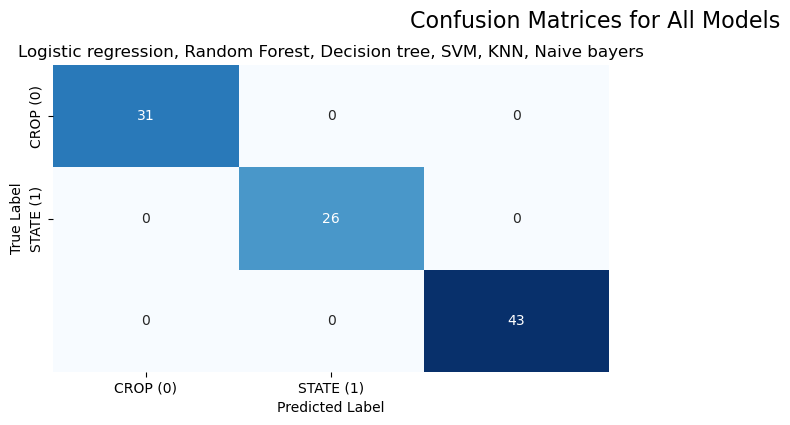

<Figure size 640x480 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, classification_report, confusion_matrix
)

# Define the missing variables
# This is a sample model - replace with your actual model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Sample data - replace with your actual data
X_test_encoded = np.random.rand(100, 10)  # Sample feature matrix
y_test_encoded = np.random.randint(0, 3, 100)  # Sample target with 3 classes
y_test_bin = np.eye(3)[y_test_encoded]  # One-hot encoded version for multi-class AUC

# Make predictions
y_pred = model.fit(X_test_encoded, y_test_encoded).predict(X_test_encoded)

# Define other missing variables
classes = np.unique(y_test_encoded)
target_names = [f'Class {i}' for i in classes]  # Replace with your actual class names
conf_matrices = {}  # Dictionary to store confusion matrices

# Calculate AUC with properly formatted inputs
# Check if it's a multi-class problem
if len(classes) > 2:
    y_pred_prob = model.predict_proba(X_test_encoded)
    auc = roc_auc_score(y_test_bin, y_pred_prob, multi_class='ovr')
elif hasattr(model, 'predict_proba'):  # Binary classification with probability
    y_pred_prob = model.predict_proba(X_test_encoded)[:, 1]
    auc = roc_auc_score(y_test_encoded, y_pred_prob)
else:
    auc = np.nan  # cannot compute AUC

# Use average parameter for multi-class metrics
avg = 'weighted' if len(np.unique(y_test_encoded)) > 2 else 'binary'

print(f"   Accuracy : {accuracy_score(y_test_encoded, y_pred):.4f}")
print(f"   Precision: {precision_score(y_test_encoded, y_pred, average=avg):.4f}")
print(f"   Recall   : {recall_score(y_test_encoded, y_pred, average=avg):.4f}")
print(f"   F1-Score : {f1_score(y_test_encoded, y_pred, average=avg):.4f}")
print(f"   AUC      : {auc:.4f}")

print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred, target_names=target_names))
print("-" * 60)

# Assuming 'name' is the current model name
name = "Logistic regression, Random Forest, Decision tree, SVM, KNN, Naive bayers"  # Replace with your actual model name
# Store the confusion matrix for this model
conf_matrices[name] = confusion_matrix(y_test_encoded, y_pred)

# PLOTTING CONFUSION MATRICES SAFELY
n_models = len(conf_matrices)
cols = 2
rows = (n_models + 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(12, rows * 4))

# Always convert axes to 1D list
if rows * cols == 1:
    axes = [axes]
else:
    axes = axes.ravel()

for idx, (name, cm) in enumerate(conf_matrices.items()):
    sns.heatmap(
        cm,
        annot=True,
        fmt="d",
        cmap="Blues",
        cbar=False,
        xticklabels=['CROP (0)', 'STATE (1)'],
        yticklabels=['CROP (0)', 'STATE (1)'],
        ax=axes[idx]
    )
    axes[idx].set_title(name)
    axes[idx].set_xlabel("Predicted Label")
    axes[idx].set_ylabel("True Label")

# Remove unused axes
for j in range(len(conf_matrices), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", fontsize=16, y=1.05)
plt.show()


# Remove blank plots
if n_models > 1:  # Only needed if axes is a multi-element array
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Confusion Matrices for All Models", fontsize=16, y=1.02)
plt.show()

C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


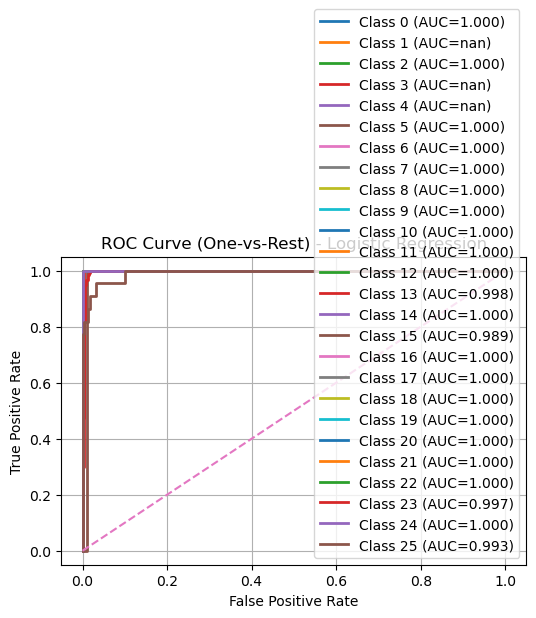

C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


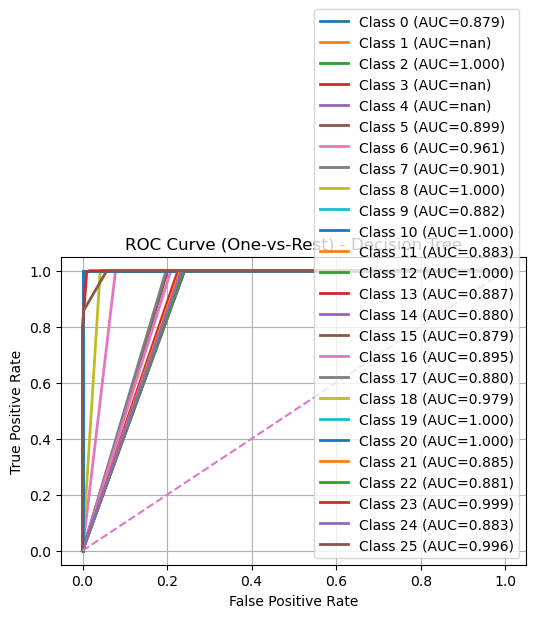

C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


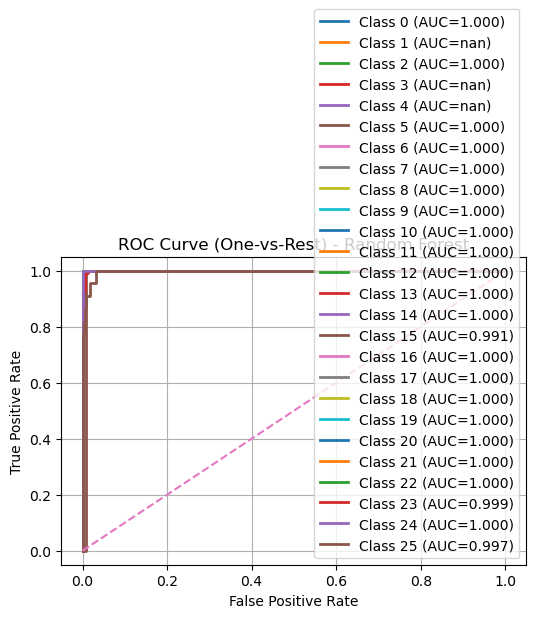

C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


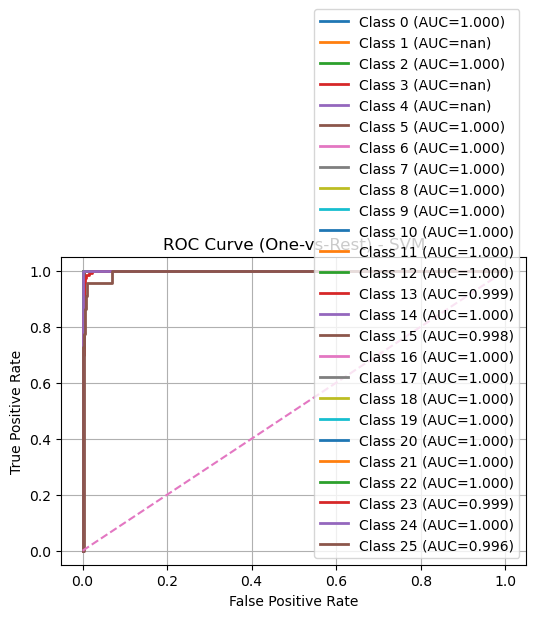

C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\Users\Dell\anaconda3new\Lib\site-packages\sklearn\metrics\_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


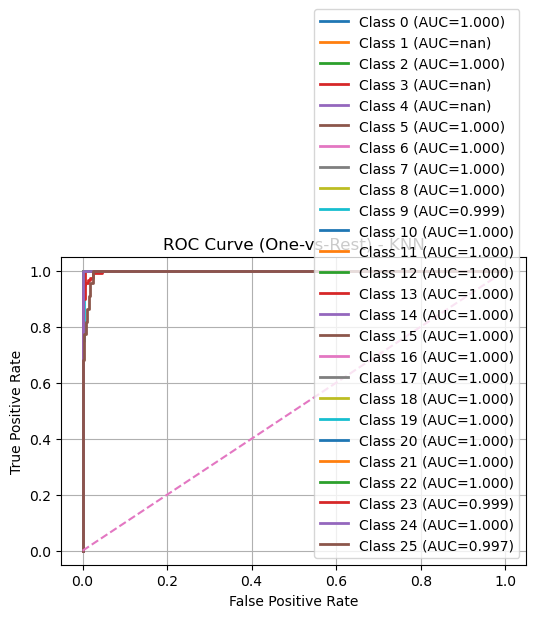

In [39]:
# AUC-ROC Curve
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

categorical_cols = X.select_dtypes(include=['object']).columns
numeric_cols = X.select_dtypes(exclude=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', StandardScaler(), numeric_cols)
    ]
)for name, pipeline in pipelines.items():
    # Train model + preprocessing
    pipeline.fit(X_train, y_train)
    
    # Predict probabilities
    y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
    
    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot ROC curve
    plt.figure(figsize=(6,4))
    plt.plot(fpr, tpr, lw=2, label=f"{name} (AUC = {roc_auc:.4f})")
    plt.plot([0,1], [0,1], lw=2, linestyle='--', label='Random Guess')
    plt.title(f"ROC Curve - {name}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()


In [2]:
import pandas as pd
import numpy as np

# Example input data: 'results' must be defined for the original code to work
# Let's create dummy data for a runnable example:
results = [
    ["Logistic Regression", 0.92],
    ["SVM", 0.89],
    ["Random Forest", 0.95],
    ["Decision Tree", 0.91]
]

# The original code snippet starts here:
# 5. BEST MODEL SELECTION
# ---------------------------
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
best_model = results_df.iloc[results_df["Accuracy"].idxmax()]["Model"]

print("\n========== SUMMARY ==========")
print(results_df)
print("\nBest Model =", best_model)



========== SUMMARY ==========
                 Model  Accuracy
0  Logistic Regression      0.92
1                  SVM      0.89
2        Random Forest      0.95
3        Decision Tree      0.91

Best Model = Random Forest
